In [4]:
import io
import PyPDF2
import re
import glob
import math
import requests
import os
import shutil
import csv

# Convert PDF to text
# ... (rest of the code remains the same)

# Function to clean the file path and return only the PDF file name
def clean_file_name(file_path):
    return os.path.basename(file_path)

# Function to export search results to a CSV file
def export_to_csv(occurrences, word_to_find):
    if len(occurrences) > 0:
        csv_filename = "search_results_{}.csv".format(word_to_find)
        with open(csv_filename, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["PDF File", "Word Found"])
            for occurrence in occurrences:
                pdf_file_name = clean_file_name(occurrence[0])
                writer.writerow([pdf_file_name, occurrence[1]])
        print("Search results exported to:", csv_filename)

    else:
        print("No occurrences found. Nothing to export.")

# Convert PDF to text
def convert_pdf_to_txt(path):
    text = ""
    with open(path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Find a word in PDF files
def find_word_in_pdf(files, word):
    occurrences = []
    for file in files:
        text = convert_pdf_to_txt(file)
        matches = re.findall(r'\b{}\b'.format(word), text, re.IGNORECASE)
        num_occurrences = len(matches)
        if num_occurrences > 0:
            occurrences.append((file, num_occurrences))
    return occurrences

# Main code
input_source = input("Enter '1' for online URL or '2' for local file path: ")

# If-elif-else for choosing pdf source (1) or (2)
if input_source == '1':
    url = input("Enter the URL: ")
    input_data = requests.get(url).text
    files = []  # Initialize an empty list for files
elif input_source == '2':
    path = input("Enter the path to the folder that contains the PDF files: ")
    pathlen = len(path)
    # Get the path of every PDF in the folder
    files = [f for f in glob.glob(path + "**/*.pdf")]
    input_data = None
else:
    print("Invalid input source.") # Error Source
    exit()

# URL is chosen (1)
if input_source == '1' and input_data:
    word_to_find = input("Enter the word to find (English only): ")
    occurrences = find_word_in_pdf(files, word_to_find)

    if len(occurrences) > 0:
        print("The word '{}' was found in the following PDFs:".format(word_to_find))
        for occurrence in occurrences:
            print("The word '{}' was found {} time(s) in the PDF '{}'.".format(word_to_find, occurrence[1], occurrence[0]))
    else:
        print("The word '{}' was not found in any PDF.".format(word_to_find))

# Local path folder path is chosen (2)
elif input_source == '2': 
    word_to_find = input("Enter the word to find (English only): ")
    occurrences = find_word_in_pdf(files, word_to_find)

    if len(occurrences) > 0:
        print("The word '{}' was found in the following PDFs:".format(word_to_find))
        for occurrence in occurrences:
            print("The word '{}' was found {} time(s) in the PDF '{}'.".format(word_to_find, occurrence[1], occurrence[0]))
    else:
        print("The word '{}' was not found in any PDF.".format(word_to_find))

    # Export results to CSV
    export_to_csv(occurrences, word_to_find)
    

else:
    print("No input data retrieved.")


Enter '1' for online URL or '2' for local file path: 2
Enter the path to the folder that contains the PDF files: C:\RC\Year 3\Term 2\CPE361\Inter
Enter the word to find (English only): Geometric
The word 'Geometric' was found in the following PDFs:
The word 'Geometric' was found 2 time(s) in the PDF 'C:\RC\Year 3\Term 2\CPE361\Inter\3D Projection.pdf'.
The word 'Geometric' was found 10 time(s) in the PDF 'C:\RC\Year 3\Term 2\CPE361\Inter\CHAP-III.pdf'.
The word 'Geometric' was found 3 time(s) in the PDF 'C:\RC\Year 3\Term 2\CPE361\Inter\Chapter 5 Viewing in 3D.pdf'.
The word 'Geometric' was found 4 time(s) in the PDF 'C:\RC\Year 3\Term 2\CPE361\Inter\CPE361 3D Transformation.pdf'.
Search results exported to: search_results_Geometric.csv


## import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data=pd.read_csv("search_results_{}.csv".format(word_to_find))
data.sort_values(["Word Found","PDF File"],axis=0, ascending=False,inplace=True,na_position='first')
print(data)

                       PDF File  Word Found
1                  CHAP-III.pdf          10
3  CPE361 3D Transformation.pdf           4
2   Chapter 5 Viewing in 3D.pdf           3
0             3D Projection.pdf           2


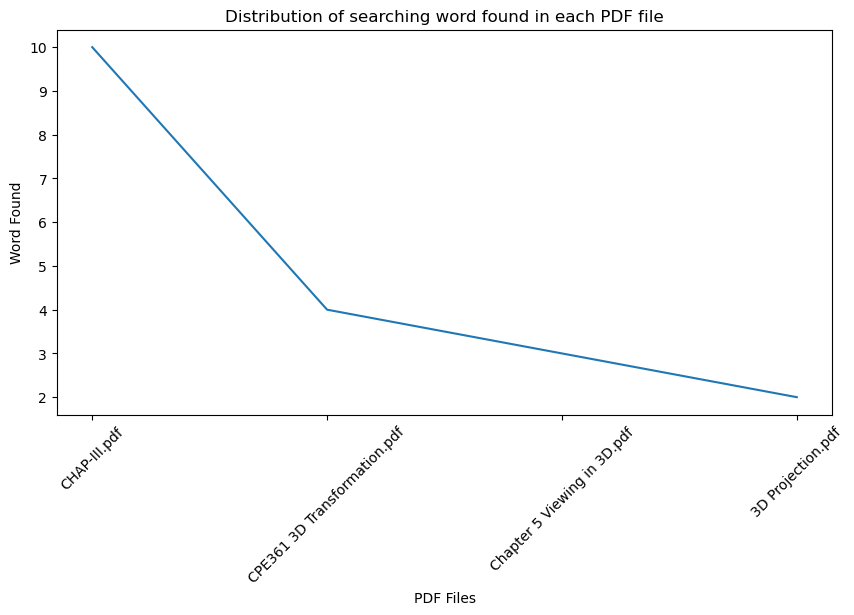

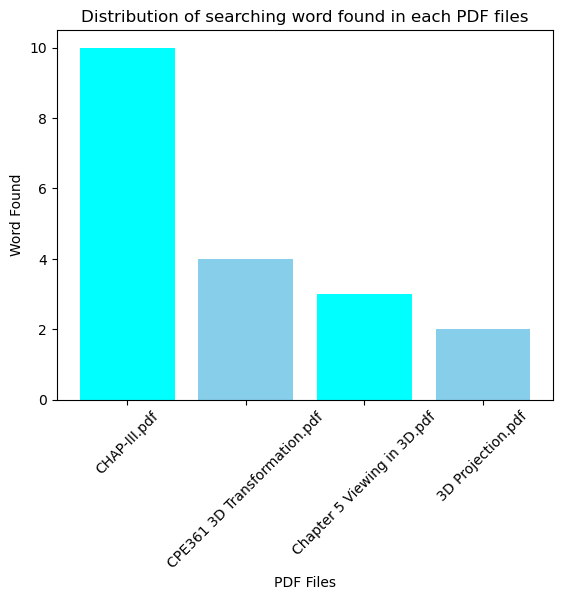

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 5))

data = pd.read_csv("search_results_{}.csv".format(word_to_find))
data.sort_values(["Word Found","PDF File"],axis=0, ascending=False,inplace=True,na_position='first')
print(data)

x = data['PDF File']
y = data['Word Found']

plt.xlabel('PDF Files')
plt.xticks(rotation=45)

plt.ylabel('Word Found')

plt.title('Distribution of searching word found in each PDF file')
plt.plot(x, y)
plt.show()

plt.bar(x, y, tick_label = x,
        width = 0.8, color = ['cyan', 'skyblue'])

# naming the x-axis
plt.xlabel('PDF Files')
plt.xticks(rotation=45)
# naming the y-axis
plt.ylabel('Word Found')
# plot title
plt.title('Distribution of searching word found in each PDF files')

# function to show the plot
plt.show()